<a href="https://colab.research.google.com/github/HrishikeshA15/ABC/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

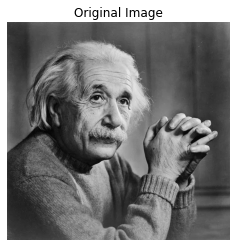

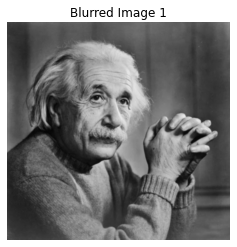

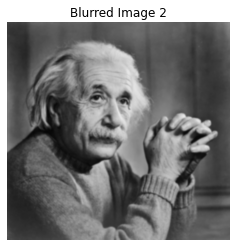

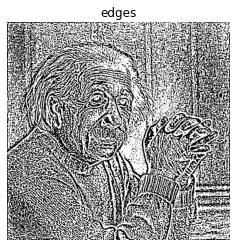

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/einstein.jpg")



blur_gaus1 = cv2.GaussianBlur(img,(5,5),0)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),0)
fig = blur_gaus1 - blur_gaus2

plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img)
plt.figure(),plt.axis("off"),plt.title("Blurred Image 1"),plt.imshow(blur_gaus1)
plt.figure(),plt.axis("off"),plt.title("Blurred Image 2"),plt.imshow(blur_gaus2)

plt.figure(),plt.axis("off"),plt.title("edges"),plt.imshow(fig)


plt.show()


In [ ]:
import cv2
import numpy as np

codec = cv2.VideoWriter_fourcc(*'mp4v')


video = cv2.VideoCapture('/content/drive/MyDrive/videoplayback.mp4')
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)
iter=cv2.VideoWriter('final-video.mp4', codec, 30, size)
tframes = video.get(cv2.CAP_PROP_FRAME_COUNT)
#print(tframes)

for i in range(int(tframes)-6750):


    _, img = video.read()
    roi = cv2.imread('/content/drive/MyDrive/CV Pics/Barrel.png', 1)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)


    roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
    normalized = cv2.normalize(roi_hist, np.zeros((180, 256)), 0, 255, cv2.NORM_MINMAX)
    res = cv2.calcBackProject([hsv_img], [0, 1], roi_hist, [0, 180, 0, 256], 1)
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    res = cv2.filter2D(res, -1, disc)
    ret, thresh = cv2.threshold(res, 75, 255, cv2.THRESH_BINARY)

    kernel = np.ones((11, 11))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    final = cv2.merge((thresh,thresh,thresh))
    result = cv2.bitwise_or(img, final)


    iter.write(result)

iter.release()